In [ ]:
! pip install iopath

In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 17.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15819 (delta 31), reused 43 (delta 17), pack-reused 15743 (from 1)
Receiving objects: 100% (15819/15819), 6.39 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (11523/11523), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your 

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import json
from PIL import Image

def yolo_to_coco(yolo_label_dir, image_dir, output_json_file, class_names):
    coco_format = {
        "images": [],
        "annotations": [],
        "categories": []
    }

    # Add category information (class labels)
    for i, class_name in enumerate(class_names):
        coco_format["categories"].append({
            "id": i + 1,  # COCO categories start from 1, not 0
            "name": class_name,
            "supercategory": "none"  # Optional: Can be customized if necessary
        })

    annotation_id = 1  # COCO annotation ID starts from 1
    image_id = 1  # COCO image ID starts from 1

    for image_filename in os.listdir(image_dir):
        if image_filename.endswith(".jpg") or image_filename.endswith(".png"):
            image_path = os.path.join(image_dir, image_filename)
            label_path = os.path.join(yolo_label_dir, image_filename.replace(".jpg", ".txt").replace(".png", ".txt"))

            # Get image width and height
            with Image.open(image_path) as img:
                img_width, img_height = img.size

            # Create image entry for COCO
            coco_format["images"].append({
                "id": image_id,
                "file_name": image_filename,
                "width": img_width,
                "height": img_height
            })

            # Read YOLO labels
            if os.path.exists(label_path):
                with open(label_path, 'r') as label_file:
                    for line in label_file:
                        parts = line.strip().split()
                        class_id = int(parts[0])  # YOLO class id (starts from 0)
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])

                        # Convert YOLO to COCO (bounding box in COCO format: [x_min, y_min, width, height])
                        x_min = (x_center - width / 2) * img_width
                        y_min = (y_center - height / 2) * img_height
                        bbox_width = width * img_width
                        bbox_height = height * img_height

                        # Create annotation entry for COCO
                        coco_format["annotations"].append({
                            "id": annotation_id,
                            "image_id": image_id,
                            "category_id": class_id + 1,  # COCO categories start from 1
                            "bbox": [x_min, y_min, bbox_width, bbox_height],
                            "area": bbox_width * bbox_height,
                            "iscrowd": 0
                        })
                        annotation_id += 1

            image_id += 1

    # Save COCO format to a JSON file
    with open(output_json_file, 'w') as output_json:
        json.dump(coco_format, output_json, indent=4)


In [ ]:
# Example usage
class_names = ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']  # Your class names
yolo_label_dir = "/content/drive/MyDrive/Waste Detection and Classification/train/labels"  # Path to the YOLO label directory
image_dir = "/content/drive/MyDrive/Waste Detection and Classification/train/images"  # Path to the image directory
output_json_file = "/content/drive/MyDrive/Waste Detection and Classification/train/coco_annotations2.json"  # Output JSON file for COCO

yolo_to_coco(yolo_label_dir, image_dir, output_json_file, class_names)

In [ ]:
# Example usage
class_names = ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']  # Your class names
yolo_label_dir = "/content/drive/MyDrive/Waste Detection and Classification/test/labels"  # Path to the YOLO label directory
image_dir = "/content/drive/MyDrive/Waste Detection and Classification/test/images"  # Path to the image directory
output_json_file = "/content/drive/MyDrive/Waste Detection and Classification/test/coco_annotations2.json"  # Output JSON file for COCO

yolo_to_coco(yolo_label_dir, image_dir, output_json_file, class_names)

In [ ]:
# Example usage
class_names = ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']  # Your class names
yolo_label_dir = "/content/drive/MyDrive/Waste Detection and Classification/valid/labels"  # Path to the YOLO label directory
image_dir = "/content/drive/MyDrive/Waste Detection and Classification/valid/images"  # Path to the image directory
output_json_file = "/content/drive/MyDrive/Waste Detection and Classification/valid/coco_annotations2.json"  # Output JSON file for COCO

yolo_to_coco(yolo_label_dir, image_dir, output_json_file, class_names)

In [3]:
import yaml
import torch
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.logger import setup_logger
setup_logger()

import os

In [4]:
# Function to unregister datasets if already registered
DatasetCatalog.clear()  # Clear all registered datasets
MetadataCatalog.clear()  # Clear metadata cache
def unregister_dataset(dataset_name):
    try:
        DatasetCatalog.get(dataset_name)  # Try to get the dataset to check if it's registered
        DatasetCatalog.remove(dataset_name)  # Remove the dataset if found
    except KeyError:
        pass  # If dataset is not found, simply pass

# Unregister datasets if already registered
unregister_dataset("train_dataset")
unregister_dataset("val_dataset")
unregister_dataset("test_dataset")


In [5]:
import os
import yaml
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer

# Load dataset.yaml configuration file
with open('/content/drive/MyDrive/Waste Detection and Classification/coco_data_index1.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# Register datasets (using COCO format)
from detectron2.data.datasets import register_coco_instances

# Register the datasets: train, validation, and test
register_coco_instances("train_dataset", {}, config['train_annotations'], config['train'])
register_coco_instances("val_dataset", {}, config['val_annotations'], config['val'])
register_coco_instances("test_dataset", {}, config['test_annotations'], config['test'])


[12/01 08:58:38 d2.data.datasets.coco]: Loaded 4200 images in COCO format from /content/drive/MyDrive/Waste Detection and Classification/train/coco_annotations_index1.json


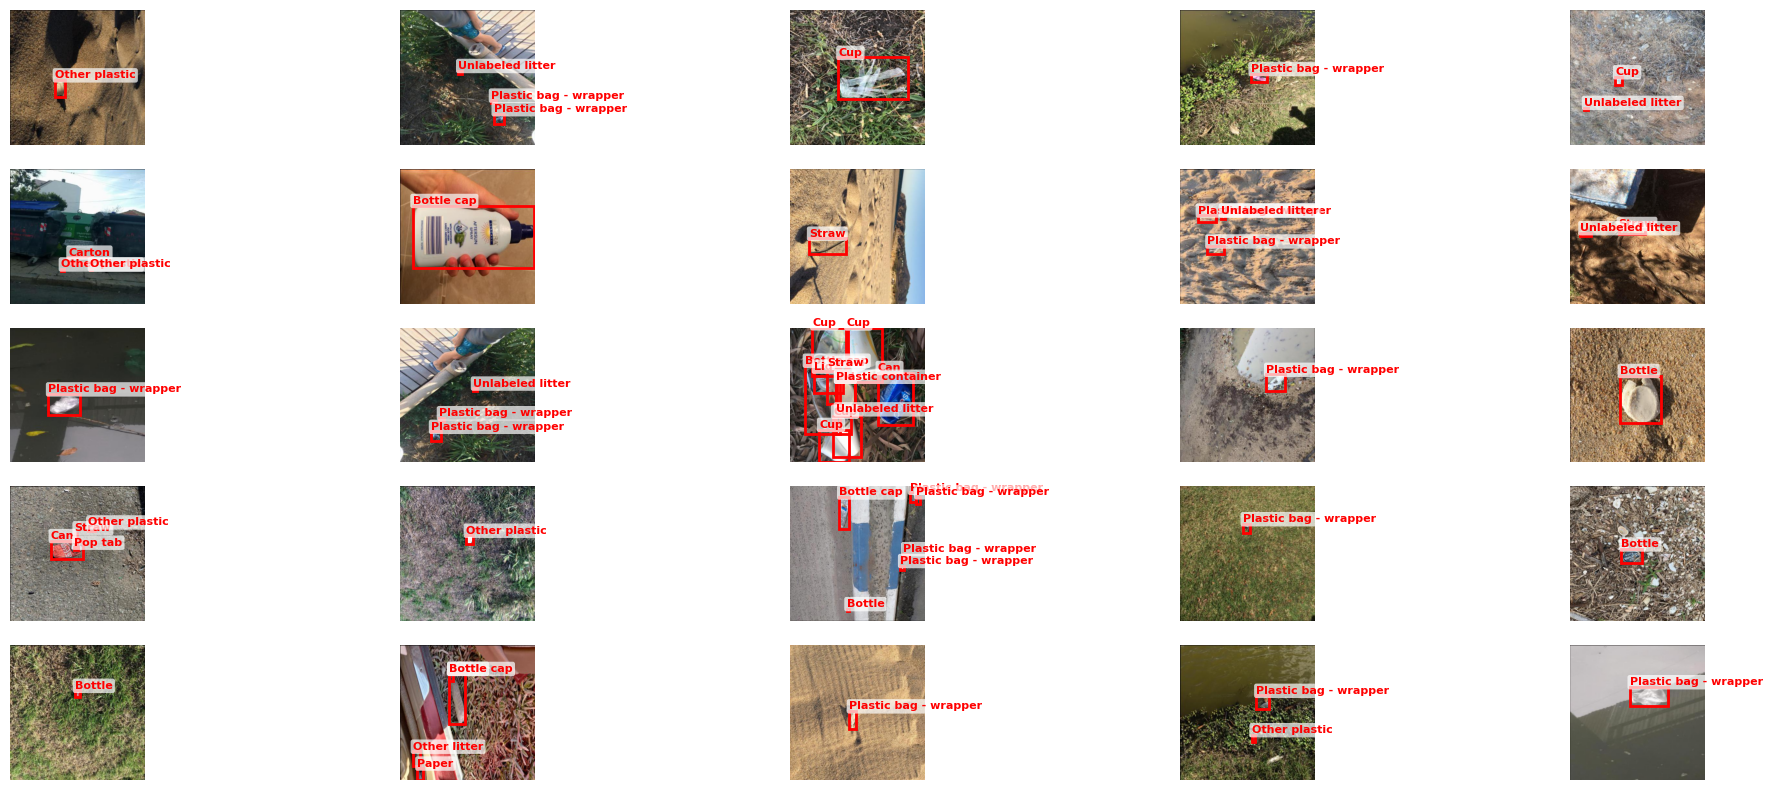

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog
import json

# Retrieve the dataset from DatasetCatalog
dataset_dicts = DatasetCatalog.get("train_dataset")

# Define the function to plot the image with bounding boxes and class names
def plot_image_with_boxes(image, boxes, labels, ax, category_map):
    """
    Plots an image with bounding boxes and class names.

    :param image: Image to plot
    :param boxes: List of bounding boxes [x1, y1, x2, y2]
    :param labels: List of category IDs for the bounding boxes
    :param ax: matplotlib axes object for plotting
    :param category_map: Mapping of category IDs to class names
    """
    ax.imshow(image)
    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label next to the bounding box
        ax.text(x1, y1 - 5, category_map[label], color='r', fontsize=8, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# Create a category map (category_id -> category_name)
with open(config['train_annotations'], 'r') as f:
    annotations = json.load(f)
category_map = {category["id"]: category["name"] for category in annotations["categories"]}

# Create a grid layout for displaying 10 images (2 rows, 5 columns)
fig, axes = plt.subplots(5, 5, figsize=(20, 8))

# Loop through the first 10 images in the train dataset
for idx, ax in enumerate(axes.flat):
    if idx < len(dataset_dicts):
        image_info = dataset_dicts[idx]
        image_path = image_info["file_name"]

        # Read the image using OpenCV
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Retrieve bounding boxes and class labels for this image from annotations
        image_id = image_info["image_id"]
        boxes = []
        labels = []
        for annotation in annotations["annotations"]:
            if annotation["image_id"] == image_id:
                bbox = annotation["bbox"]
                category_id = annotation["category_id"]

                # COCO format bbox is [x, y, width, height], convert to [x1, y1, x2, y2]
                x, y, w, h = bbox
                boxes.append([x, y, x + w, y + h])
                labels.append(category_id)

        # Plot the image with bounding boxes and class labels
        plot_image_with_boxes(image, boxes, labels, ax, category_map)

    ax.axis("off")  # Turn off axis for clean display

# Adjust layout to avoid overlapping
plt.tight_layout()

plt.show()

In [5]:
import torch
torch.cuda.empty_cache()

In [6]:
# Create configuration object
cfg = get_cfg()

# Load Faster R-CNN config with a ResNet50 backbone
cfg.merge_from_file("/content/drive/My Drive/Waste Detection and Classification/fasterrcnn_output/faster_rcnn_ResNeSt_50.yaml")

# Update configuration with values from the dataset.yaml
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("val_dataset",)  # Usually use validation set for testing during training
cfg.DATASETS.TEST_FINAL = ("test_dataset",)  # Use for final evaluation after training

# Set the number of classes (excluding the background class)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(config['names'])

# Set the learning rate, batch size, and max iterations from the yaml file
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.WARMUP_ITERS = 100  # Number of iterations for warm-up
cfg.SOLVER.WARMUP_FACTOR = 0.001  # Warm-up factor for better stability

# Set the output directory where checkpoints will be saved
cfg.OUTPUT_DIR = "/content/drive/My Drive/Waste Detection and Classification/fasterrcnn_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Set the pre-trained weights for the model (you can change this based on your needs)
cfg.MODEL.WEIGHTS = "/content/drive/My Drive/Waste Detection and Classification/fasterrcnn_output/faster_rcnn_ResNeSt_50.pth"

# Set other parameters (e.g., batch size for ROI heads, score threshold for inference)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Calculate how often to save checkpoints (e.g., every 5 epochs)
# Calculate the checkpoint period in terms of iterations
dataset_size = len(DatasetCatalog.get("train_dataset"))  # Total number of training images
iterations_per_epoch = dataset_size // config['solver']['batch_size']
checkpoint_period = 5 * iterations_per_epoch  # Save every 5 epochs

# Set the checkpoint period
cfg.SOLVER.CHECKPOINT_PERIOD = checkpoint_period
cfg.MODEL.DEVICE = "cuda"

[12/01 10:15:46 d2.data.datasets.coco]: Loaded 4200 images in COCO format from /content/drive/MyDrive/Waste Detection and Classification/train/coco_annotations_index1.json


In [7]:
# Check number of classes
num_classes = cfg.MODEL.ROI_HEADS.NUM_CLASSES
print(f"Number of classes in the model: {num_classes}")

# Optionally, check the class names if provided in the config
if "CLASS_NAMES" in cfg.MODEL.ROI_HEADS:
    print(f"Class names in the model: {cfg.MODEL.ROI_HEADS.CLASS_NAMES}")
else:
    print("Class names not provided in the configuration.")


Number of classes in the model: 18
Class names not provided in the configuration.


In [8]:
import os

# Set environment variable for better memory allocation
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [9]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader, MetadataCatalog
import os

# Create the trainer and train the model
trainer = DefaultTrainer(cfg)

# Register the evaluator
trainer.build_evaluator = lambda: COCOEvaluator("val_dataset", cfg, True, output_dir=cfg.OUTPUT_DIR)

# Define a custom hook for logging precision, recall, and mAP during training
from detectron2.engine import HookBase

class LogMetricsEveryNIterations(HookBase):
    def __init__(self, eval_period=100):
        self.eval_period = eval_period

    def after_step(self):
        if self.trainer.iter % self.eval_period == 0:
            # Perform evaluation and log precision, recall, and mAP
            evaluator = COCOEvaluator("val_dataset", self.trainer.cfg, False, output_dir=self.trainer.cfg.OUTPUT_DIR)
            val_loader = build_detection_test_loader(self.trainer.cfg, "val_dataset")
            results = inference_on_dataset(self.trainer.model, val_loader, evaluator)

            # Log the precision, recall, and mAP here
            # This would print the metrics to the console or log file
            print(f"Iteration {self.trainer.iter}: Precision, Recall, mAP: {results}")

# Register the custom hook to be triggered every 100 iterations
trainer.register_hooks([LogMetricsEveryNIterations(eval_period=100)])

# Resume or load the model and start training
trainer.resume_or_load(resume=False)
trainer.train()

[12/01 10:15:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): SyncBatchNorm

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[12/01 10:15:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 800), max_size=1333, sample_style='range'), RandomFlip()]
[12/01 10:15:52 d2.data.build]: Using training sampler TrainingSampler
[12/01 10:15:52 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/01 10:15:52 d2.data.common]: Serializing 4200 elements to byte tensors and concatenating them all ...
[12/01 10:15:52 d2.data.common]: Serialized dataset takes 1.89 MiB
[12/01 10:15:52 d2.data.build]: Making batched data loader with batch_size=16
[12/01 10:15:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/My Drive/Waste Detection and Classification/fasterrcnn_output/faster_rcnn_ResNeSt_50.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[12/01 10:15:57 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


ERROR [12/01 10:16:09 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/content/detectron2/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/content/detectron2/detectron2/engine/defaults.py", line 530, in run_step
    self._trainer.run_step()
  File "/content/detectron2/detectron2/engine/train_loop.py", line 322, in run_step
    losses.backward()
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 581, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py", line 825, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
torch.OutOfMemoryError: CUDA out of memory. Tried to allocate 626.00 MiB. GPU 0 has a total capacity of 14.75 GiB of w

OutOfMemoryError: CUDA out of memory. Tried to allocate 626.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 115.06 MiB is free. Process 6005 has 14.63 GiB memory in use. Of the allocated memory 14.38 GiB is allocated by PyTorch, and 115.67 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [9]:
# Create the trainer and train the model
trainer = DefaultTrainer(cfg)

# Register the evaluator
trainer.build_evaluator = lambda: COCOEvaluator("val_dataset", cfg, True, output_dir=cfg.OUTPUT_DIR)
trainer.resume_or_load(resume=False)
trainer.train()

[12/01 09:58:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): SyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): SyncBatchNorm

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[12/01 09:58:13 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 800), max_size=1333, sample_style='range'), RandomFlip()]
[12/01 09:58:13 d2.data.build]: Using training sampler TrainingSampler
[12/01 09:58:13 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/01 09:58:13 d2.data.common]: Serializing 4200 elements to byte tensors and concatenating them all ...
[12/01 09:58:13 d2.data.common]: Serialized dataset takes 1.89 MiB
[12/01 09:58:13 d2.data.build]: Making batched data loader with batch_size=16
[12/01 09:58:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/My Drive/Waste Detection and Classification/fasterrcnn_output/faster_cascade_rcnn_ResNeSt_101.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[12/01 09:58:23 d2.engine.train_loop]: Starting training from iteration 0
ERROR [12/01 09:58:30 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/content/detectron2/detectron2/engine/train_loop.py", line 155, in train
    self.run_step()
  File "/content/detectron2/detectron2/engine/defaults.py", line 530, in run_step
    self._trainer.run_step()
  File "/content/detectron2/detectron2/engine/train_loop.py", line 310, in run_step
    loss_dict = self.model(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/detectron2/detectron2/modeling/meta_arch/rcnn.py", line 158, in forward
    features = self.backbone(images.tensor)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/mod

OutOfMemoryError: CUDA out of memory. Tried to allocate 40.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 23.06 MiB is free. Process 8954 has 14.72 GiB memory in use. Of the allocated memory 14.57 GiB is allocated by PyTorch, and 33.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [10]:
import os
checkpoint_path = "/content/drive/My Drive/Waste Detection and Classification/faster_cascade_rcnn_ResNeSt_101.pth"
print("Checkpoint file exists:", os.path.isfile(checkpoint_path))


Checkpoint file exists: False


In [17]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# Initialize the config
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# Load model weights (path to your .pth model)
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/Waste Detection and Classification/fasterrcnn_output/model_0003929.pth"  # Path to the .pth file
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for inference
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 18  # Make sure this matches your dataset

# Register the dataset (Assuming "val_dataset" is already registered)
cfg.DATASETS.TEST = ("val_dataset",)
#cfg.DATASETS.TRAIN = ("train_dataset",)  # Optional, if you want to evaluate on the training dataset as well
cfg.MODEL.DEVICE = "cuda"
# Initialize the model
model = build_model(cfg)  # Builds the model architecture
checkpointer = DetectionCheckpointer(model)
checkpointer.load(cfg.MODEL.WEIGHTS)  # Load model weights

# Set the model to evaluation mode
model.eval()

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [10]:
from detectron2.data import MetadataCatalog

# Get the metadata for the validation dataset
metadata = MetadataCatalog.get("val_dataset")

# Print the number of classes and the class names
print(f"Number of classes in dataset: {len(metadata.thing_classes)}")
print(f"Classes in dataset: {metadata.thing_classes}")


Number of classes in dataset: 18
Classes in dataset: ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']


In [18]:
from detectron2.evaluation import COCOEvaluator

evaluator = COCOEvaluator("val_dataset", cfg, False, output_dir="./output2/")

In [19]:
from detectron2.evaluation import inference_on_dataset, COCOEvaluator
from detectron2.data import build_detection_test_loader

# Create a data loader for the test set
data_loader = build_detection_test_loader(cfg, "val_dataset")

# Run inference and evaluate metrics
metrics = inference_on_dataset(model, data_loader, evaluator)

# Print the metrics (COCO-style mAP and other details)
print(metrics)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.88s).
Accumulating evaluation results...
DONE (t=0.22s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

backbone.res2.0.conv1.norm.{bias, weight}
backbone.res2.0.conv1.weight
backbone.res2.0.conv2.norm.{bias, weight}
backbone.res2.0.conv2.weight
backbone.res2.0.conv3.norm.{bias, weight}
backbone.res2.0.conv3.weight
backbone.res2.0.shortcut.norm.{bias, weight}
backbone.res2.0.shortcut.weight
backbone.res2.1.conv1.norm.{bias, weight}
backbone.res2.1.conv1.weight
backbone.res2.1.conv2.norm.{bias, weight}
backbone.res2.1.conv2.weight
backbone.res2.1.conv3.norm.{bias, weight}
backbone.res2.1.conv3.weight
backbone.res2.2.conv1.norm.{bias, weight}
backbone.res2.2.conv1.weight
backbone.res2.2.conv2.norm.{bias, weight}
backbone.res2.2.conv2.weight
backbone.res2.2.conv3.norm.{bias, weight}
backbone.res2.2.conv3.weight
backbone.res3.0.conv1.norm.{bias, weight}
backbone.res3.0.conv1.weight
backbone.res3.0.conv2.norm.{bias, weight}
backbone.res3.0.conv2.weight
backbone.res3.0.conv3.norm.{bias, weight}
backbone.res3.0.conv3.weight
backbone.res3.0.shortcut.norm.{bias, weight}
backbone.res3.0.shortcut.w

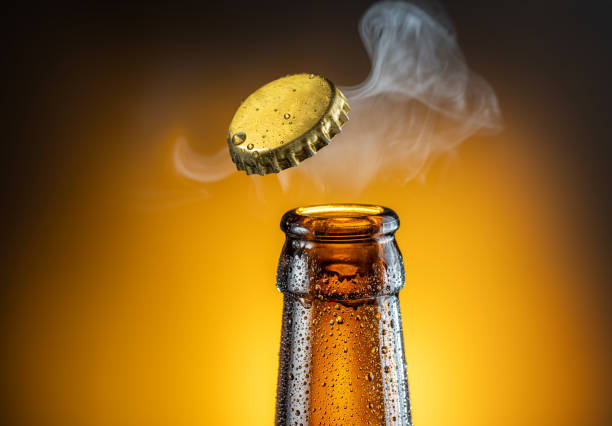

In [16]:
import cv2
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog

# Path to the image and your .pth model
image_path = '/content/drive/My Drive/Waste Detection and Classification/Output Images/test_image_3.jpg'
model_path = '/content/drive/MyDrive/Waste Detection and Classification/fasterrcnn_output/model_0003929.pth'  # The path to your .pth model

# Set up Detectron2 config
cfg = get_cfg()
#cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # You may use another config for your task
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 18  # Number of classes in your dataset (ensure this matches the model's training config)
cfg.MODEL.WEIGHTS = model_path  # Path to your trained model
cfg.DATASETS.TEST = ("val_dataset",)  # Make sure this corresponds to your dataset name
cfg.MODEL.DEVICE = "cuda"  # Use GPU if available: "cuda", otherwise use "cpu"

# Initialize the predictor (detectron2's DefaultPredictor handles inference)
predictor = DefaultPredictor(cfg)

# Open the image using OpenCV
image = cv2.imread(image_path)

# Check if the image loaded properly
if image is None:
    print("Error: Image could not be loaded. Check the image path.")
else:
    # Run the image through the model to get predictions
    outputs = predictor(image)

    # Extract predictions
    pred_boxes = outputs["instances"].pred_boxes  # Bounding box coordinates (x1, y1, x2, y2)
    pred_classes = outputs["instances"].pred_classes  # Class IDs of detected objects
    pred_scores = outputs["instances"].scores  # Confidence scores for each detection

    # Load the class names from MetadataCatalog (this depends on your dataset configuration)
    metadata = MetadataCatalog.get("val_dataset")  # Ensure this matches your dataset registration name
    class_names = metadata.thing_classes  # Class names for your dataset

    # Define a color map for different object categories (you can customize these colors)
    color_map = {
        "Aluminium foil": (255, 0, 0),  # Red
        "Bottle cap": (0, 255, 0),  # Green
        "Bottle": (0, 0, 255),  # Blue
        "Broken glass": (255, 165, 0),  # Orange
        "Can": (255, 255, 0),  # Yellow
        "Carton": (0, 255, 255),  # Cyan
        "Cigarette": (128, 0, 128),  # Purple
        "Cup": (255, 105, 180),  # Hot Pink
        "Lid": (255, 69, 0),  # Red-Orange
        "Other litter": (128, 128, 128),  # Gray
        "Other plastic": (0, 255, 0),  # Green
        "Paper": (0, 128, 0),  # Dark Green
        "Plastic bag - wrapper": (255, 182, 193),  # Light Pink
        "Plastic container": (186, 85, 211),  # Medium Orchid
        "Pop tab": (255, 140, 0),  # Dark Orange
        "Straw": (72, 61, 139),  # Dark Slate Blue
        "Styrofoam piece": (0, 255, 255),  # Cyan
        "Unlabeled litter": (169, 169, 169),  # Dark Gray
    }

    # Iterate over each prediction and draw the bounding box with label and color
    for i, box in enumerate(pred_boxes):  # Accessing bounding box coordinates
        # Check the box structure and print it out to debug
        print(f"Bounding Box {i}: {box}")  # Print box to inspect its structure

        # Extract the box coordinates and convert them to integers
        if len(box) == 4:  # Ensure it contains exactly four values
            # Convert tensor to list and then unpack as x1, y1, x2, y2
            x1, y1, x2, y2 = box.tolist()  # Convert to list and unpack
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])  # Convert coordinates to integers
        else:
            print(f"Unexpected box format: {box}")
            continue  # Skip this box if it doesn't have the expected format

        label = class_names[int(pred_classes[i])]  # Get the label name
        confidence = pred_scores[i].item()  # Confidence score

        # Set the color based on the object label (use a default if label is unknown)
        color = color_map.get(label, (255, 255, 255))  # Default to white if not in color_map

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Prepare the label text: label + confidence score
        label_text = f"{label} ({confidence:.2f})"

        # Get text size to adjust placement of the text
        font_scale = 0.5
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(label_text, font, font_scale, 1)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + text_size[1]  # Adjust if label is too close to the top

        # Draw the label text
        cv2.putText(image, label_text, (text_x, text_y), font, font_scale, color, 1, cv2.LINE_AA)



    # Save or display the image with bounding boxes and labels
    output_path = '/content/drive/My Drive/Waste Detection and Classification/Output Images/output_image_1.jpg'
    cv2.imwrite(output_path, image)  # Save the output image

    # Display the image with bounding boxes and labels (optional)
    cv2_imshow(image)
